# Importando librerías

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Importando el dataset

In [3]:
filepath = '../Datasets_Proyecto3/dataset.csv'
dataset = pd.read_csv(filepath)
dataset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,simple_toxic
0,5f140a8f41763bad,"""== A barnstar for you! ==\n\n The Minor barn...",0,0,0,0,0,0,0
1,c57b608d96f057f2,"""==Glenn Beck Hoax==\nThis topic should be del...",0,0,0,0,0,0,0
2,1d9867f0f60ba9bd,"""\n\n Date of establishment \n\nCharles MacKay...",0,0,0,0,0,0,0
3,17eb2a66bfce1023,==AfD nomination of Untitled Chilli Album== \n...,0,0,0,0,0,0,0
4,b8324615a1bcaf58,scum who look up to Che deserve the worst kind...,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
22350,8c7dd2ac90e2930a,== Fucc whut they think!!!!! == \n\n Hey Torra...,1,0,1,0,1,0,1
22351,2405b14938eed8be,"""\n\n Time to reactivate the \n\nWell, it has...",0,0,0,0,0,0,0
22352,22088761aece5f38,"WMC, after reviewing the second part of this e...",0,0,0,0,0,0,0
22353,b73c2ec014274e02,== Dramatizations == \n\n The article mention...,0,0,0,0,0,0,0


### Establecer clasificación del texto.

In [4]:
def clean_text(text):
    return text.str.replace(r'\n', " ")

def set_class(dataset):
    dataset = dataset.copy() 
    dataset['bad'] = dataset[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
    dataset['class'] = [1 if i else 0 for i in dataset['bad'] > 0]
    dataset['text'] = clean_text(dataset['comment_text'])
    return dataset[['text', 'class']]

In [5]:
new_dataset = dataset.pipe(set_class)
new_dataset

C:\Users\David Zacarias\AppData\Local\Temp\ipykernel_23584\2818078862.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return text.str.replace(r'\n', " ")


,text,class
0,"""== A barnstar for you! == The Minor barnst...",0
1,"""==Glenn Beck Hoax== This topic should be dele...",0
2,""" Date of establishment Charles MacKay say...",0
3,==AfD nomination of Untitled Chilli Album== ...,0
4,scum who look up to Che deserve the worst kind...,1
...,...,...
22350,== Fucc whut they think!!!!! == Hey Torranc...,1
22351,""" Time to reactivate the Well, it has bee...",0
22352,"WMC, after reviewing the second part of this e...",0
22353,== Dramatizations == The article mentions ...,0


# Generar el conjunto de prueba

In [6]:
dataset_copy = new_dataset
y = dataset_copy["class"]
X = list(dataset_copy['text'])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
y_train

4653     0
1274     0
20049    0
13501    0
19183    0
        ..
1760     0
20104    0
1568     0
14644    0
9842     0
Name: class, Length: 17884, dtype: int64

# Explorar los datos para obtener ideas

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22355 entries, 0 to 22354
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22355 non-null  object
 1   comment_text   22355 non-null  object
 2   toxic          22355 non-null  int64 
 3   severe_toxic   22355 non-null  int64 
 4   obscene        22355 non-null  int64 
 5   threat         22355 non-null  int64 
 6   insult         22355 non-null  int64 
 7   identity_hate  22355 non-null  int64 
 8   simple_toxic   22355 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ MB


In [10]:
dataset.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,simple_toxic
count,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000,22355.000000
mean,0.096131,0.009170,0.054484,0.003221,0.050369,0.009439,0.101096
std,0.294777,0.095323,0.226976,0.056662,0.218710,0.096695,0.301462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dataset.shape

(22355, 9)

In [12]:
new_dataset["class"].value_counts()

0    20095
1     2260
Name: class, dtype: int64

### Correlación de los datos (Matriz de Correlación)

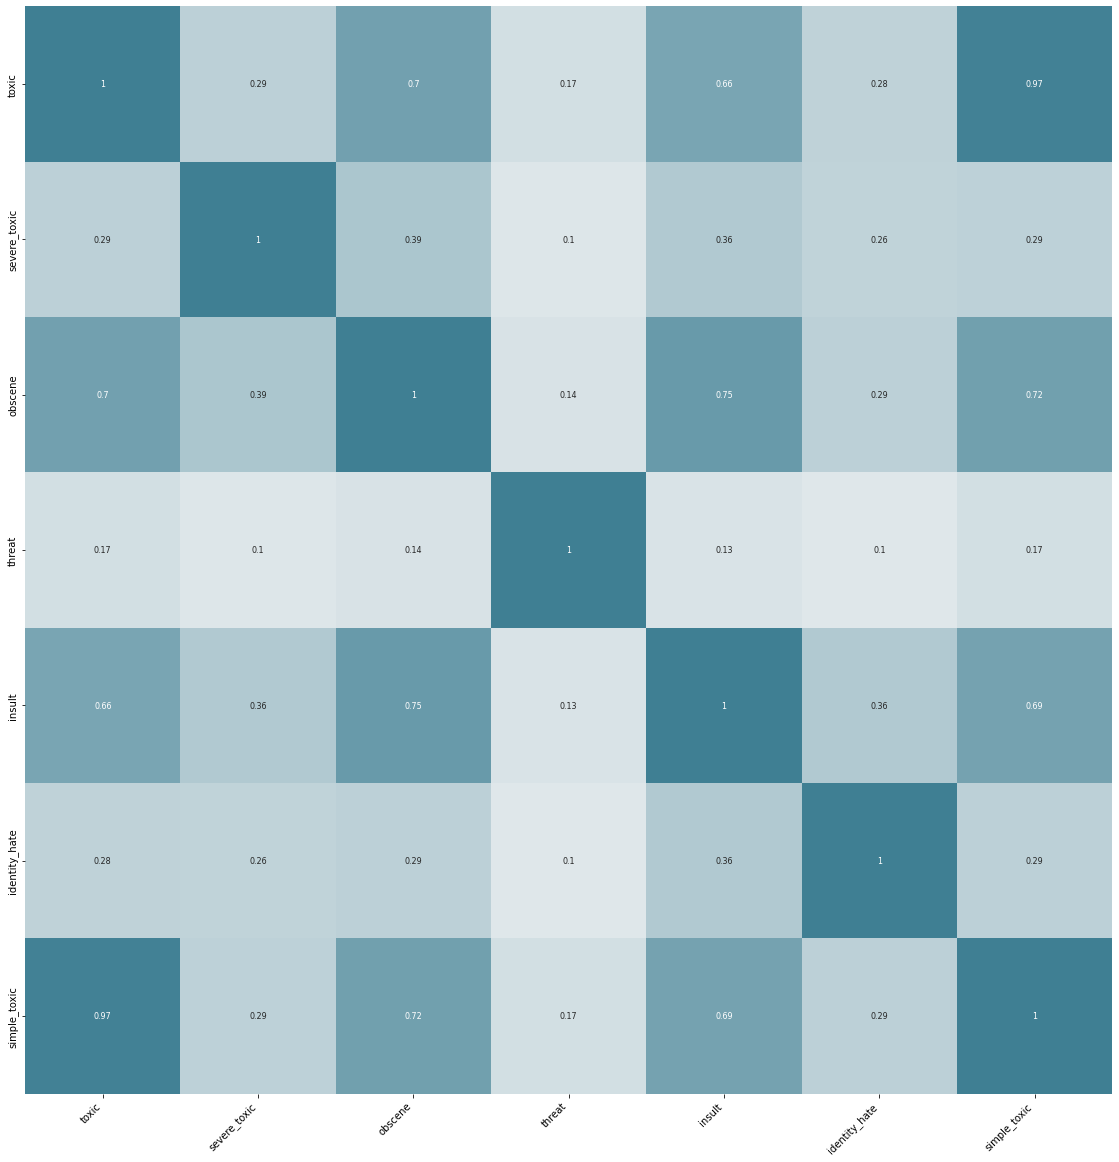

In [13]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))

sb.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {"size": 8},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sb.diverging_palette(20, 220, n=200),
    square = True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Explorar modelos diferentes y preseleccionar los mejores.

In [14]:
accuracy, precision, recall = {}, {}, {}
models = {}
models['Logistic Regression'] = ''
models['K-Nearest Neighbor'] = ''
models['SVC'] = ''
models['SVC Kernel'] = ''
models['Decision Trees'] = ''
models['Random Forest'] = ''

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0, class_weight="balanced")

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

model_log_reg = Pipeline([
    ("lang", CountVectorizer()),
    ("log_reg", log_reg)
])
model_log_reg.fit(list(X_train), y_train)

c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('lang', CountVectorizer()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [17]:
y_pred = model_log_reg.predict(X_test)

print("Predicción (Logistic Regression):", y_pred)

Predicción (Logistic Regression): [0 0 0 ... 0 0 1]


In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3894  163]
 [ 112  302]]


In [19]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  302
False Positive(FP) =  163
True Negative(TN)  =  3894
False Negative(FN) =  112


In [20]:
accuracy['Logistic Regression'] = accuracy_score(y_test, y_pred)
print(accuracy['Logistic Regression'])

0.9384925072690673


In [21]:
precision['Logistic Regression'] = precision_score(y_test, y_pred)
print(precision['Logistic Regression'])

0.6494623655913978


In [22]:
recall['Logistic Regression'] = recall_score(y_test, y_pred)
print(recall['Logistic Regression'])

0.7294685990338164


### K-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [24]:
model_knn = Pipeline([
    ("lang", CountVectorizer()),
    ("knn", knn)
])
model_knn.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()), ('knn', KNeighborsClassifier())])

In [25]:
y_pred = model_knn.predict(X_test)

print("Predicción (K-Nearest Neighbor):", y_pred)

Predicción (K-Nearest Neighbor): [0 0 0 ... 0 0 0]


In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3982   75]
 [ 319   95]]


In [27]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  95
False Positive(FP) =  75
True Negative(TN)  =  3982
False Negative(FN) =  319


In [28]:
accuracy['K-Nearest Neighbor'] = accuracy_score(y_test, y_pred)
print(accuracy['K-Nearest Neighbor'])

0.9118765376873182


In [29]:
precision['K-Nearest Neighbor'] = precision_score(y_test, y_pred)
print(precision['K-Nearest Neighbor'])

0.5588235294117647


In [30]:
recall['K-Nearest Neighbor'] = recall_score(y_test, y_pred)
print(recall['K-Nearest Neighbor'])

0.22946859903381642


### SVC

In [31]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state = 0, probability=True, class_weight="balanced")

In [32]:
model_svc = Pipeline([
    ("lang", CountVectorizer()),
    ("svc", svc)
])
model_svc.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear', probability=True,
                     random_state=0))])

In [33]:
y_pred = model_svc.predict(X_test)

print("Predicción (SVC):", y_pred)

Predicción (SVC): [0 0 0 ... 0 0 0]


In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3904  153]
 [ 131  283]]


In [35]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  283
False Positive(FP) =  153
True Negative(TN)  =  3904
False Negative(FN) =  131


In [36]:
accuracy['SVC'] = accuracy_score(y_test, y_pred)
print(accuracy['SVC'])

0.9364795347796914


In [37]:
precision['SVC'] = precision_score(y_test, y_pred,zero_division=0)
print(precision['SVC'])

0.6490825688073395


In [38]:
recall['SVC'] = recall_score(y_test, y_pred)
print(precision['SVC'])

0.6490825688073395


### SVC Kernel

In [39]:
svc_kernel = SVC(kernel = 'rbf', random_state = 0, probability=True, class_weight="balanced")

In [40]:
model_svc_kernel = Pipeline([
    ("lang", CountVectorizer()),
    ("svc_kernel", svc_kernel)
])
model_svc_kernel.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('svc_kernel',
                 SVC(class_weight='balanced', probability=True,
                     random_state=0))])

In [41]:
y_pred = model_svc_kernel.predict(X_test)

print("Predicción (SVC Kernel):", y_pred)

Predicción (SVC Kernel): [0 0 0 ... 0 0 1]


In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3193  864]
 [  71  343]]


In [43]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  343
False Positive(FP) =  864
True Negative(TN)  =  3193
False Negative(FN) =  71


In [44]:
accuracy['SVC Kernel'] = accuracy_score(y_test, y_pred)
print(accuracy['SVC Kernel'])

0.7908745247148289


In [45]:
precision['SVC Kernel'] = precision_score(y_test, y_pred,zero_division=0)
print(precision['SVC Kernel'])

0.28417564208782103


In [46]:
recall['SVC Kernel'] = recall_score(y_test, y_pred)
print(recall['SVC Kernel'])

0.8285024154589372


### Decision Tree Classification

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, class_weight="balanced")

In [48]:
model_tree = Pipeline([
    ("lang", CountVectorizer()),
    ("tree", tree)
])
model_tree.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', random_state=0))])

In [49]:
y_pred = model_tree.predict(X_test)

print("Predicción (Decision Tree Classification):", y_pred)

Predicción (Decision Tree Classification): [0 0 0 ... 0 0 0]


In [50]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3738  319]
 [ 179  235]]


In [51]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  235
False Positive(FP) =  319
True Negative(TN)  =  3738
False Negative(FN) =  179


In [52]:
accuracy['Decision Trees'] = accuracy_score(y_test, y_pred)
print(accuracy['Decision Trees'])

0.8886155222545292


In [53]:
precision['Decision Trees'] =precision_score(y_test, y_pred)
print(precision['Decision Trees'])

0.42418772563176893


In [54]:
recall['Decision Trees'] =recall_score(y_test, y_pred)
print(recall['Decision Trees'])

0.5676328502415459


### Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, class_weight="balanced")

In [56]:
model_rnd_forest = Pipeline([
    ("lang", CountVectorizer()),
    ("rnd_forest", rnd_forest)
])
model_rnd_forest.fit(list(X_train), y_train)

Pipeline(steps=[('lang', CountVectorizer()),
                ('rnd_forest',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', n_estimators=10,
                                        random_state=0))])

In [57]:
y_pred = model_rnd_forest.predict(X_test)

print("Predicción (Random Forest Classification):", y_pred)

Predicción (Random Forest Classification): [0 0 0 ... 0 0 0]


In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4017   40]
 [ 315   99]]


In [59]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  99
False Positive(FP) =  40
True Negative(TN)  =  4017
False Negative(FN) =  315


In [60]:
accuracy['Random Forest'] =accuracy_score(y_test, y_pred)
print(accuracy['Random Forest'])

0.9205994184746141


In [61]:
precision['Random Forest'] =precision_score(y_test, y_pred)
print(precision['Random Forest'])

0.7122302158273381


In [62]:
recall['Random Forest'] =recall_score(y_test, y_pred)
print(recall['Random Forest'])

0.2391304347826087


### Resumen

In [63]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.938493,0.649462,0.729469
K-Nearest Neighbor,0.911877,0.558824,0.229469
SVC,0.936480,0.649083,0.683575
SVC Kernel,0.790875,0.284176,0.828502
Decision Trees,0.888616,0.424188,0.567633
Random Forest,0.920599,0.712230,0.239130


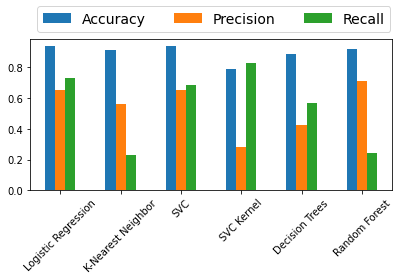

In [64]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

# Afinar los modelos.

### Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

parameters = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['liblinear'],
    'class_weight': ["balanced"]
}

grid_search = GridSearchCV(log_reg, param_grid=parameters,
                   scoring='accuracy', cv=10) 

In [74]:
model_grid_search = Pipeline([
    ("lang", CountVectorizer()),
    ("grid_search", grid_search)
])

In [75]:
model_grid_search.fit(list(X_train), y_train)

c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converg

Pipeline(steps=[('lang', CountVectorizer()),
                ('grid_search',
                 GridSearchCV(cv=10, estimator=LogisticRegression(),
                              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                          'class_weight': ['balanced'],
                                          'penalty': ['l2'],
                                          'solver': ['liblinear']},
                              scoring='accuracy'))])

In [76]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 10.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [77]:
log_reg_gs = LogisticRegression(C=10, class_weight="balanced", 
                            penalty="l2", solver="liblinear")

model_log_reg_gs = Pipeline([
    ("lang", CountVectorizer()),
    ("log_reg_gs", log_reg_gs)
])

model_log_reg_gs.fit(list(X_train), y_train)

c:\Users\David Zacarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('lang', CountVectorizer()),
                ('log_reg_gs',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='liblinear'))])

In [78]:
y_pred = model_log_reg_gs.predict(X_test)

In [79]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3917  140]
 [ 122  292]]


In [80]:
accuracy_score(y_test, y_pred)

0.9414001341981659

In [81]:
precision_score(y_test, y_pred)

0.6759259259259259

In [82]:
recall_score(y_test, y_pred)

0.7053140096618358

In [89]:
df_model = pd.DataFrame(index=["Logistic Regression", "Grid Search CV"], columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = [accuracy["Logistic Regression"], accuracy_score(y_test, y_pred)]
df_model['Precision'] = [precision["Logistic Regression"], precision_score(y_test, y_pred)]
df_model['Recall'] = [recall["Logistic Regression"], recall_score(y_test, y_pred)]

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.938493,0.649462,0.729469
Grid Search CV,0.941400,0.675926,0.705314


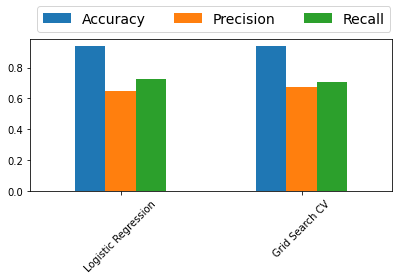

In [90]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

In [92]:
y_pred = model_log_reg_gs.predict(["you are stupid"])

print("Predicción: ", y_pred)

Predicción:  [1]


In [93]:
y_pred = model_log_reg_gs.predict(["Hello world"])

print("Predicción: ", y_pred)

Predicción:  [0]
